# lab4

# import python labs

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# connect to db

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur=conn.cursor()

# q1

In [4]:
sql_statement = """
        select * from gp4.student
        """

In [5]:
df=pandas.read_sql_query(sql_statement,conn)
df[:]

,s_email,s_name,s_major
0,bobj@dukes.jmu.edu,Joe Bob,Intelligence Analysis
1,jameslb@dukes.jmu.edu,LeBron James,Intelligence Analysis
2,doej@dukes.jmu.edu,Jill Doe,Intelligence Analysis
3,bondj@dukes.jmu.edu,James Bond,Intelligence Analysis


# q2

In [8]:
sql_statement = """
        select gp4.professor.p_name,
        gp4.course.c_name
        from gp4.professor
        inner join gp4.course
        on gp4.professor.p_email = gp4.course.p_email
        """
print(sql_statement)


        select gp4.professor.p_name,
        gp4.course.c_name
        from gp4.professor
        inner join gp4.course
        on gp4.professor.p_email = gp4.course.p_email
        


In [9]:
df=pandas.read_sql_query(sql_statement,conn)
df[:]

,p_name,c_name
0,Xuebin Wei,"Data Mining, Modeling and Knowledge Discovery ..."
1,Stephen P Marrin,Seminar on Issues in Intelligence Analysis
2,Barry Larry,Topics in IA
3,Barry Larry,Hypothesis Testing
4,Ronald Raab,"Awareness and Understanding of Chemical, Biolo..."


# q3

In [10]:
sql_statement = """
        select c_number,
        count(*) as num_enroll
        from gp4.enroll_list
        group by c_number
        """
print(sql_statement)


        select c_number,
        count(*) as num_enroll
        from gp4.enroll_list
        group by c_number
        


<AxesSubplot:xlabel='c_number'>

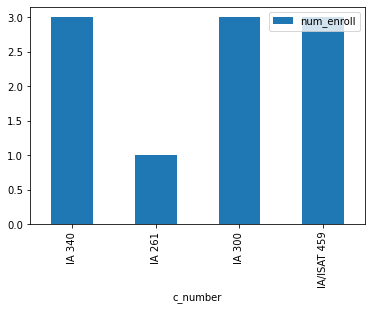

In [11]:
df=pandas.read_sql_query(sql_statement,conn)

df.plot.bar(x='c_number',y='num_enroll')

# q4

In [12]:
sql_statement = """
        select gp4.professor.p_name,
        count(*) as c_teach
        from gp4.professor
        inner join gp4.course
        on gp4.professor.p_email = gp4.course.p_email
        group by gp4.professor.p_name
        """
print(sql_statement)


        select gp4.professor.p_name,
        count(*) as c_teach
        from gp4.professor
        inner join gp4.course
        on gp4.professor.p_email = gp4.course.p_email
        group by gp4.professor.p_name
        


<AxesSubplot:xlabel='p_name'>

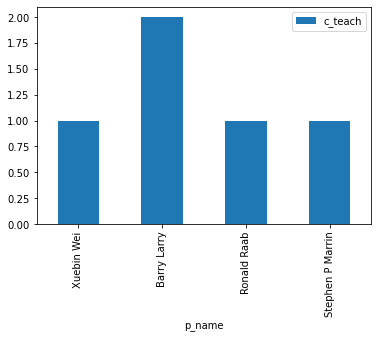

In [13]:
df=pandas.read_sql_query(sql_statement,conn)

df.plot.bar(x='p_name',y='c_teach')

# q5

In [21]:
sql_statement = """
                insert into gp4.professor(p_email,p_name,office)
                values('{}','{}','{}')
                                
                """.format('tzus@jmu.edu','Sun Tzu','ISAT/CS 0001')

print(sql_statement)


                insert into gp4.professor(p_email,p_name,office)
                values('tzus@jmu.edu','Sun Tzu','ISAT/CS 0001')
                                
                


In [22]:
cur.execute(sql_statement)

In [25]:
conn.commit()

In [35]:
df=pandas.read_sql_query('select * from gp4.professor',conn)
df[:]

,p_email,p_name,office
0,marrinsp@jmu.edu,Stephen P Marrin,EnGeo 2104
1,weixx@jmu.edu,Xuebin Wei,ISAT/CS 112
2,larryb@jmu.edu,Barry Larry,ISAT/CS 420
3,raabrw@jmu.edu,Ronald Raab,ISAT/CS 156
4,tzus@jmu.edu,Sun Tzu,ISAT/CS 0001


In [30]:
sql_statement = """
                insert into gp4.course(c_number,c_name,c_room, p_email)
                values('{}','{}','{}','{}')
                                
                """.format('IA 555','Art of IA','ISAT/CS 0002','tzus@jmu.edu')

print(sql_statement)


                insert into gp4.course(c_number,c_name,c_room, p_email)
                values('IA 555','Art of IA','ISAT/CS 0002','tzus@jmu.edu')
                                
                


In [33]:
cur.execute(sql_statement)

In [34]:
conn.commit()

In [36]:
df=pandas.read_sql_query('select * from gp4.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA 340,"Data Mining, Modeling and Knowledge Discovery ...",EnGeo 2010,weixx@jmu.edu
1,IA 300,Seminar on Issues in Intelligence Analysis,ISAT/CS 0150,marrinsp@jmu.edu
2,IA 401,Topics in IA,EnGeo 0000,larryb@jmu.edu
3,IA 261,Hypothesis Testing,ISAT/CS 0136,larryb@jmu.edu
4,IA/ISAT 459,"Awareness and Understanding of Chemical, Biolo...",EnGeo 1302,raabrw@jmu.edu
5,IA 555,Art of IA,ISAT/CS 0002,tzus@jmu.edu


# q6

In [37]:
sql_statement = """
                update gp4.course
                set p_email = 'tzus@jmu.edu'
                where p_email = 'raabrw@jmu.edu'
                
                """

print(sql_statement)


                update gp4.course
                set p_email = 'tzus@jmu.edu'
                where p_email = 'raabrw@jmu.edu'
                
                


In [38]:
cur.execute(sql_statement)

In [39]:
conn.commit()

In [40]:
df=pandas.read_sql_query('select * from gp4.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA 340,"Data Mining, Modeling and Knowledge Discovery ...",EnGeo 2010,weixx@jmu.edu
1,IA 300,Seminar on Issues in Intelligence Analysis,ISAT/CS 0150,marrinsp@jmu.edu
2,IA 401,Topics in IA,EnGeo 0000,larryb@jmu.edu
3,IA 261,Hypothesis Testing,ISAT/CS 0136,larryb@jmu.edu
4,IA 555,Art of IA,ISAT/CS 0002,tzus@jmu.edu
5,IA/ISAT 459,"Awareness and Understanding of Chemical, Biolo...",EnGeo 1302,tzus@jmu.edu


In [41]:
sql_statement = """
                delete from gp4.professor
                where p_email = 'raabrw@jmu.edu'
                
                """

print(sql_statement)


                delete from gp4.professor
                where p_email = 'raabrw@jmu.edu'
                
                


In [42]:
cur.execute(sql_statement)

In [43]:
conn.commit()

In [44]:
df=pandas.read_sql_query('select * from gp4.professor',conn)
df[:]

,p_email,p_name,office
0,marrinsp@jmu.edu,Stephen P Marrin,EnGeo 2104
1,weixx@jmu.edu,Xuebin Wei,ISAT/CS 112
2,larryb@jmu.edu,Barry Larry,ISAT/CS 420
3,tzus@jmu.edu,Sun Tzu,ISAT/CS 0001


# close cursor and connection

In [45]:
cur.close()
conn.close()